### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from collections import deque

### **1. Input Data**

$\ Domain :  -20 \leq x \leq 20$
<br>
$\ f(x) = 2x + 3$
<br>
Sampling the Random Noise points using <font color='red'>**Gaussian Normal Distribution**</font> ***(mu=0, sigma=1)***

In [0]:
def input():
  #-20부터 20까지 정수의 x
  x = np.linspace(-20,20,41)
  #print(x)
  target_y = copy.deepcopy(x)
  for i in range(0, 41):
    # y = 2x + 3
    target_y[i] = 2 * target_y[i] + 3
  #print(y)

  y = copy.deepcopy(target_y)
  #print(y)
  n = np.random.normal(0,1,41)
  #print(n)
  y = np.add(y,n)
  #print(y)

  print("Plotting the input data")
  fig = plt.figure()
  #설정한 초기의 그래프
  graph1 = plt.plot(x, target_y, 'b')
  plt.xlabel('x')
  plt.ylabel('target_y')
  #랜덤하게 샘플링한 점들
  graph2 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return x, y

### **2. Linear Regression**
1) Linear Model
<br>
$\ h(x) = \theta_1x + \theta_0 $
<br>
<br>
2) Objective Function
<br>
$\ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta} (x ^{(i)} )-y^{(i)})^2 $
<br>
<br>
3) Gradient Descent
<br>
$\ \theta_0^{(t+1)} =  \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$
<br>
$\ \theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$
<br>
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = 6$  
$\ \theta_1^{(0)} = 5$
<br>
$\ lr = 10^{-7}$



In [0]:
def ObjectiveFunction(m, b, y):
  #print(m)
  cost = 0
  for x in range(-20, 21):
    h = m * x + b
    #print("m의 값",m)
    r = y[x+20]
    cost += np.square(h - r) / 400
    #print(cost)
  return cost

In [0]:
def gradientDescent(m, b, y):
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    lr = 0.0001
    b -= lr * np.square(h-r) / 200
    m -= lr * x * np.square(h-r) / 200
  return b, m 

Plotting the input data


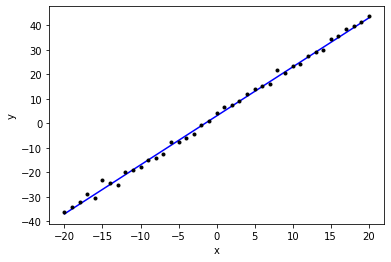

Plotting the Output Results


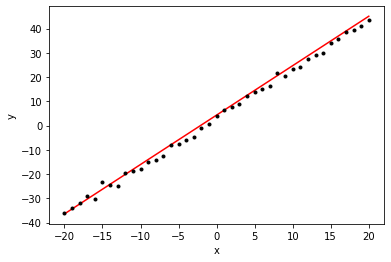

Plotting the Energy Values


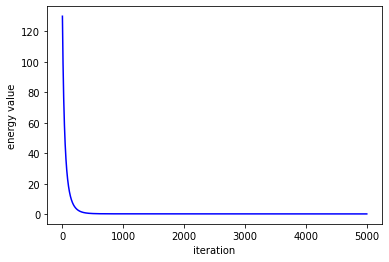

Plotting the Model Parameters


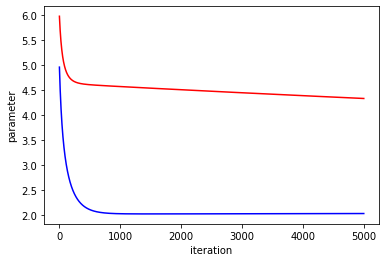

In [29]:
def main():
  x, y = input()
  #print("x", x)
  #print("y", y)
  m = 5
  b = 6   ##initialization
  costs = deque()
  bs = deque()
  ms = deque()
  iters = deque()

  for iter in range(0, 5000):
    value_Object = ObjectiveFunction(m, b, y)
    b, m = gradientDescent(m, b, y)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)

    #data수집을 위해 deque 자료구조를 이용해 저장!
    iters.append(iter)
    costs.append(value_Object)
    bs.append(b)
    ms.append(m)

  #print("iters, costs, ms, bs",iters, costs, ms, bs)
  #print("m, b",m,b)

  print("Plotting the Output Results")
  fig = plt.figure()

  graph3 = plt.plot(x, m * x + b, 'r')
  plt.xlabel('x')
  plt.ylabel('linear regression')

  graph4 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  print("Plotting the Energy Values")
  plt.plot(iters, costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('energy value')
  plt.show()

  print("Plotting the Model Parameters")
  fig = plt.figure()
  graph5 = plt.plot(iters, bs, 'r')
  graph6 = plt.plot(iters, ms, 'b')
  plt.xlabel('iteration')
  plt.ylabel('parameter')
  plt.show()

if __name__ == "__main__":
  main()